# Supervised Learning

Remember Supervised Learning  is used when we want to predict a certain outcome from a goven input and we have examples of input/output pairs.

## Classification and Regression.
This are the two major types of supervised machine learning problems.

In _Classification_ the goal is to predict a class label which is a choice from apredefined list of possibilities. It can be binary (between 2) or multiple classes.

In _Regression_ the goal is to predict a continouse number or a float point number

## Generalization, Overfitting and Underfitting
Goal is to build models that generalize as accurate as possible. If a model is able to make accurate predictions on unseen data we say it is able to generalize from the training set to the test set.

_Overfitting_ this is whenyou fir a model too closely to the particularities of the training set and obtain a model that works well in the training set but is not avle to generalize to new data.
when you don't capture all the aspects  of data and variability , your model will perform badly  even on the training set this is _Underfitting_

## Supervised Learning algorithms 
### some sample Datasets


In [1]:

import mglearn
from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

/home/muoki/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/muoki/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# generate dataset
X , y = mglearn.datasets.make_forge()

X.shape (26, 2)


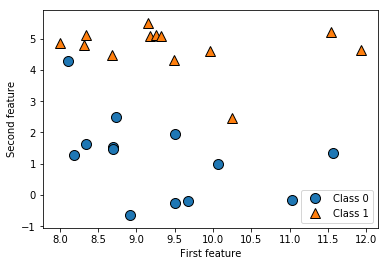

In [3]:
# plot datasets
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape", X.shape)

This dataset consists of 26 samples with 2 features
To illustrate regression we'll use synthetic wave dataset. 

Text(0,0.5,'Target')

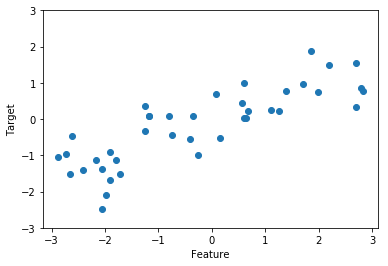

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

For real world dataset we will be using Wisconsin Breast Cancer dataset. The task is to learn to predict whether a tumor is malignant based og the measurements.

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [7]:
print("Cancer.keys():\n", cancer.keys())

Cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print("Shape of cancer data: ", cancer.data.shape)

Shape of cancer data:  (569, 30)


569 data points and 30 features

In [9]:
print("sample counts per class;\n",
     {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

sample counts per class;
 {'malignant': 212, 'benign': 357}


In [10]:
print("Feature names;\n", cancer.feature_names)

Feature names;
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


The datasets in the sklearn library can all be loaded in the same way.

### k-Nearest Neighbor
BUilding the model consists only of storing the training dataset To make a prediction for a new data point the algorithm finds the closest data points in the training dataset

#### k-neighbors classification

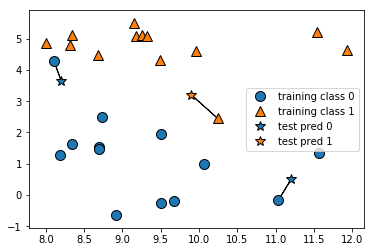

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

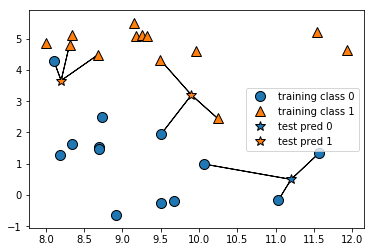

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

*Example*


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X, y = mglearn.datasets.make_forge()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [16]:
clf = KNeighborsClassifier(n_neighbors=3) #initialize

In [17]:
clf.fit(X_train, y_train) # train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
print("Test set prediction", clf.predict(X_test)) # predict

Test set prediction [1 0 1 0 1 0 0]


In [19]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


model is about 86% accurate meaning the model predicted the class 86% of the damples in the test dataset.

#### Analyzing KNeughborsClassifier

Decision boundary divides between where the algorithm assigns class 0 verse where it assigns class 1


TypeError: 'AxesSubplot' object does not support indexing

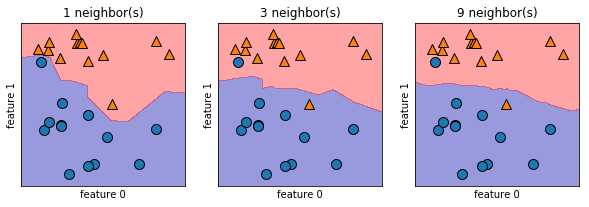

In [21]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors , ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
ax[0].legend(loc=3)

A smoother boundary  corresponds to a simpler model. Using few neighbors corresponds to high model complexity and using many neighbors corresponds to low model comlexity.
###### using breats cancer


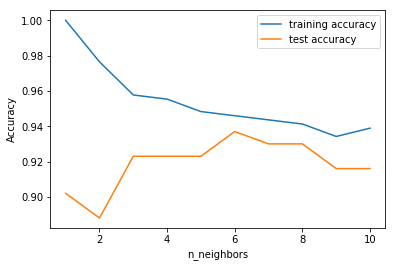

In [23]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

#### k-neighbors regression

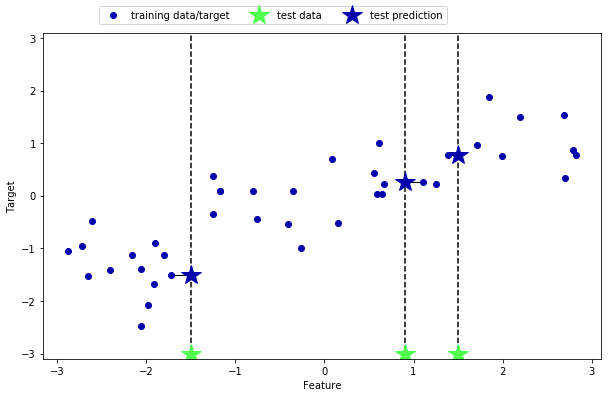

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors

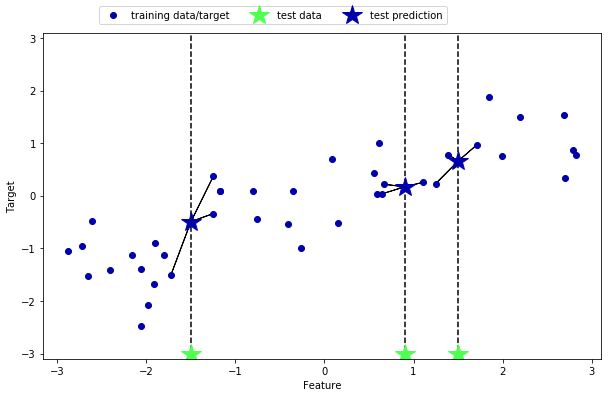

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [27]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


The score method for regressors returns the `R^2` score. this is know as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, y_train. wheb negative it indicates anticorrelated predictions.

In [28]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


####  Analyzing KNeighborsRegressor

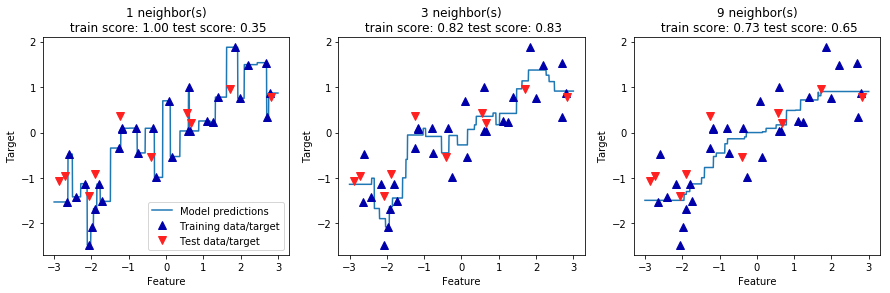

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well. 

#### Strengths, weaknesses, and parameters
there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large  prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features, and it does particularly badly with datasets where most features are 0 most of the time (sparse datasets).
it is not often used in practice, due to prediction being slow and its inability to handle many features.


### Linear Models
Linear models make a prediction using a linear function of the input features.

#### Linear models for regression.

y=ax+b

y - is the prediction
x - predictor
a - slope(coefficient)
b - bias(intercept)


w[0]: 0.393906  b: -0.031804


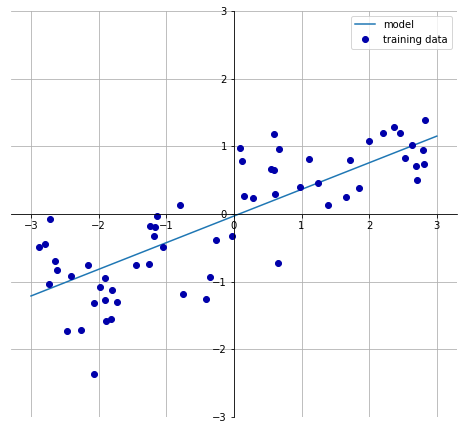

In [30]:
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions

#### Linear regression( ordinary least squares)
Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, 

In [31]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [32]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An R 2 of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. Looking at a larger dataset.


In [33]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a sign of overfitting.

#### Ridge regression
Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the train‐ ing data, but also to fit an additional constraint. We also want the magnitude of coef‐ ficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explic‐ itly restricting a model to avoid overfitting. Uses L2 Regularization.


In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


the training set score of Ridge is lower than for LinearRegression ,while the test set score is higher. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization . How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization.

In [35]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasing alpha allows the coefficients to be less restricted. For very small values of alpha , coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression.

In [36]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


We can also get a more qualitative insight into how the alpha parameter changes the model by inspecting the coef_ attribute of models with different values of alpha . A higher alpha means a more restricted model, so we expect the entries of coef_ to have smaller magnitude for a high value of alpha than for a low value of alpha.

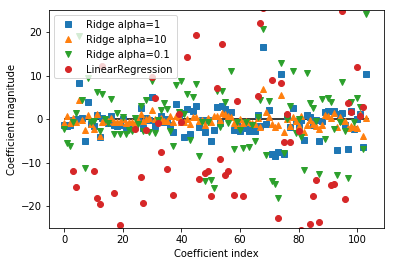

In [37]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

The y-axis shows the numeric values of the corresponding values of the coefficients. The main takeaway here is that for alpha=10 , the coefficients are mostly between around –3 and 3. The coefficients for the Ridge model with alpha=1 are somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still, and many of the dots corresponding to linear regression without any regularization 

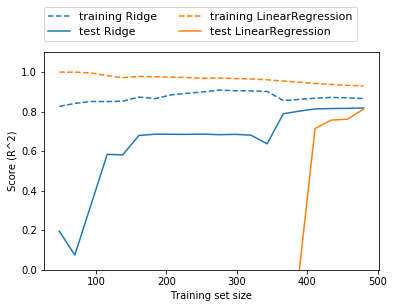

In [38]:
mglearn.plots.plot_ridge_n_samples()

the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board.  the test score for ridge is better, particularly for small subsets of the data. For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. The lesson here is that with enough train‐ ing data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance Another interesting aspect  is the decrease in training performance for linear regression. If more data is added, it becomes harder for a model to overfit, or memorize the data.

#### Lasso
using the lasso also restricts coefficients to be close to zero, but in a slightly different way with L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some fea‐ tures are entirely ignored by the model.

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


This indicates that we are underfitting, and we find that it used only 4 of the 105 features. Similarly to Ridge , the Lasso also has a regularization parameter, alpha , that controls how strongly coefficients are pushed toward zero. The default is `alpha=1.0` . To reduce underfitting, let’s try decreasing alpha . When we
do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run).

In [40]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression :

In [41]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0,0.5,'Coefficient magnitude')

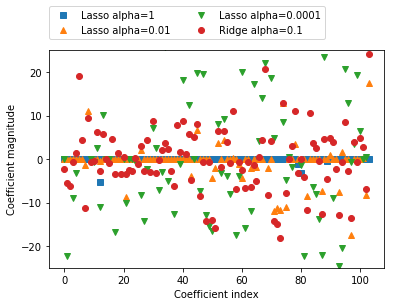

In [42]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

For alpha=1 , we not only see that most of the coefficients are zero (which we already knew), but that the remaining coefficients are also small in magnitude. Decreasing alpha to 0.01 , we obtain the solution shown as the green dots, which causes most features to be exactly zero. Using alpha=0.00001 , we get a model that is quite unregu‐ larized, with most coefficients nonzero and of large magnitude. For comparison, the best Ridge solution is shown in teal. The Ridge model with alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01 , but using Ridge , all coef‐ ficients are nonzero.

#### Linear models for classification
a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane. The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression , and linear support vector machines(linear SVMs), implemented in svm.LinearSVC. 

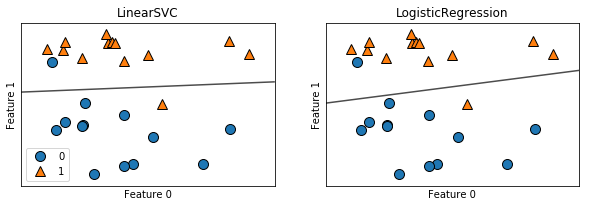

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

both models apply an L2 regularization. For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C , and higher values of C correspond to less  egularization. In other words, when you use a high value for the parameter C , LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C , the models put more emphasis on finding a coefficient vector (w) that is close to zero.
There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly.

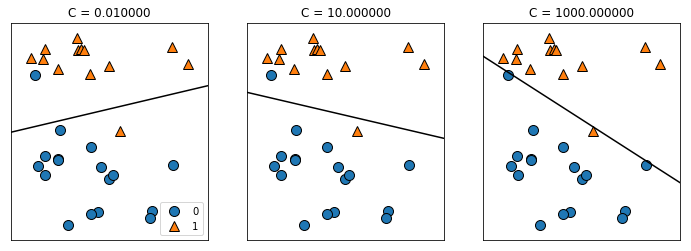

In [44]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small C corresponding to a lot of regularization. Most of the points in class 0 are at the top, and most of the points in class 1 are at the bottom. The strongly regularized model chooses a relatively horizontal line, misclas‐ sifying two points. In the center plot, C is slightly higher, and the model focuses more on the two misclassified samples, tilting the decision boundary. Finally, on the righthand side, the very high value of C in the model tilts the decision boundary a lot, now correctly classifying all points in class 0. One of the points in class 1 is still misclassified, as it is not possible to correctly classify all points in this dataset using a straight line. The model illustrated on the righthand side tries hard to correctly classify all points, but might not capture the overall layout of the classes well. In other words, this model is likely overfitting.


In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


as training and test set performance are very close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible model.

In [46]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [47]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


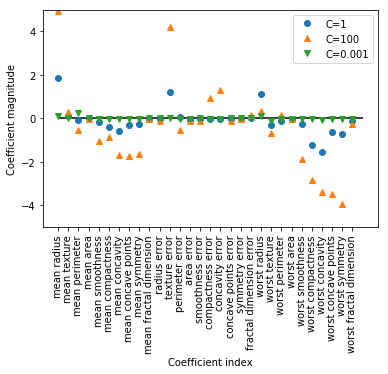

In [48]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to using only a few features.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


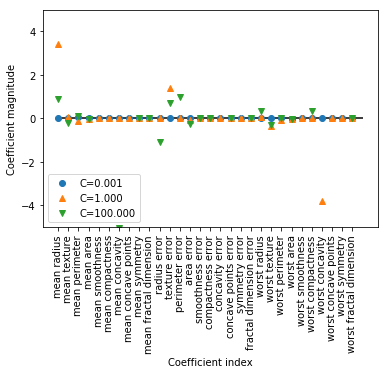

In [49]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)    

#### Linear models for multiclass classification
A common
technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction. 

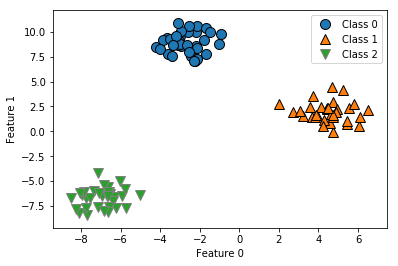

In [50]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [51]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


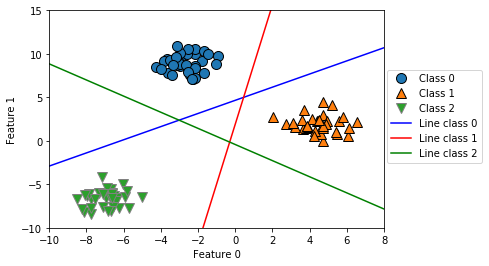

In [52]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_,
                                  linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

the predictions for all regions of the 2D
space:

Text(0,0.5,'Feature 1')

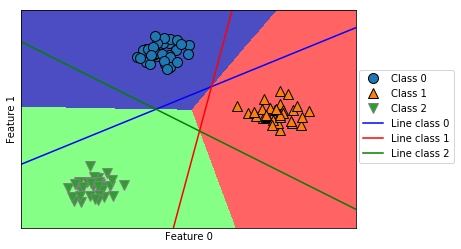

In [53]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_,
                                  linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses, and parameters
The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression . Large values for alpha or small values for C mean simple models. In particular for the regression mod‐ els, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale. The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your fea‐ tures are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.
Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thou‐ sands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge , which can be faster than the default on large datasets. Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models described here.
Another strength of linear models is that they make it relatively easy to understand how a prediction is made, using the formulas we saw earlier for regression and classi‐ fication. Unfortunately, it is often not entirely clear why coefficients are the way they are. This is particularly true if your dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.
Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because it’s not feasible to train other models. However, in lower-dimensional spaces, other models might yield better generalization performance.

### Naive Bayes Classifiers

They tend to be even faster in training as compared to linear models. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like LogisticRegression and LinearSVC . hey learn parameters by looking at each feature individually and collect simple per-class statistics from each feature. There are three kinds of naive Bayes classifiers implemented in scikitlearn : GaussianNB , BernoulliNB , and MultinomialNB . GaussianNB can be applied to any continuous data, while BernoulliNB assumes binary data and MultinomialNB assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). BernoulliNB and MultinomialNB are mostly used in text data classification. The BernoulliNB classifier counts how often every feature of each class is not zero. eg

In [54]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [55]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


MultinomialNB takes into account the average value of each feature for each class, while GaussianNB stores the average value as well as the standard deviation of each feature for each class. To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching class is predicted. Interestingly, for both MultinomialNB and BernoulliNB , this leads to a prediction formula that is of the same form as in the lin‐ ear models (see “Linear models for classification” on page 56). Unfortunately, coef_ for the naive Bayes models has a somewhat different meaning than in the linear mod‐ els, in that coef_ is not the same as w.

#### Strengths, weaknesses and parameters

MultinomialNB and BernoulliNB have a single parameter, alpha , which controls model complexity. The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. This results in a “smoothing” of the statistics. A large alpha means more smoothing, resulting in less complex models. The algorithm’s performance is relatively robust to the setting of alpha , meaning that setting alpha is not critical for good performance. However, tuning it usually improves accuracy somewhat. GaussianNB is mostly used on very high-dimensional data, while the other two var‐ iants of naive Bayes are widely used for sparse count data such as text. MultinomialNB usually performs better than BinaryNB , particularly on datasets with a relatively large number of nonzero features (i.e., large documents). The naive Bayes models share many of the strengths and weaknesses of the linear models. They are very fast to train and to predict, and the training procedure is easy to understand. The models work very well with high-dimensional sparse data and are relatively robust to the parameters. Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long. 


### Decision Tree
they learn a hierarchy of if/else questions, leading to a decision.